In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
d = 10
x = np.linspace(-d, d, 1000*d)

In [11]:
def gaussian(x, mu=0, sigma=1):
    div = 2*sigma**2
    num = (x - mu)**2
    Q = (num/div)
    scale = 1/np.sqrt(np.pi*2)*1/sigma
    return scale*np.exp(-Q)

def translate_function(func, g):
    return lambda x: func(x - g)

def manual_convolve(f, g, X):
    def convolved(x):
        return f(X)*g(x - X)
    return convolved

def analytic_convolve_gaussian(mu1, mu2, sigma1, sigma2):
    mu = mu1 + mu2
    sigma = np.sqrt(sigma1**2 + sigma2**2)
    return lambda x: gaussian(x, mu, sigma)

TG = translate_function(gaussian, 1)
G_star_G = manual_convolve(gaussian, gaussian, x)
G_star_TG = manual_convolve(gaussian, TG, x)

T_G_star_G = translate_function(G_star_G, 1)

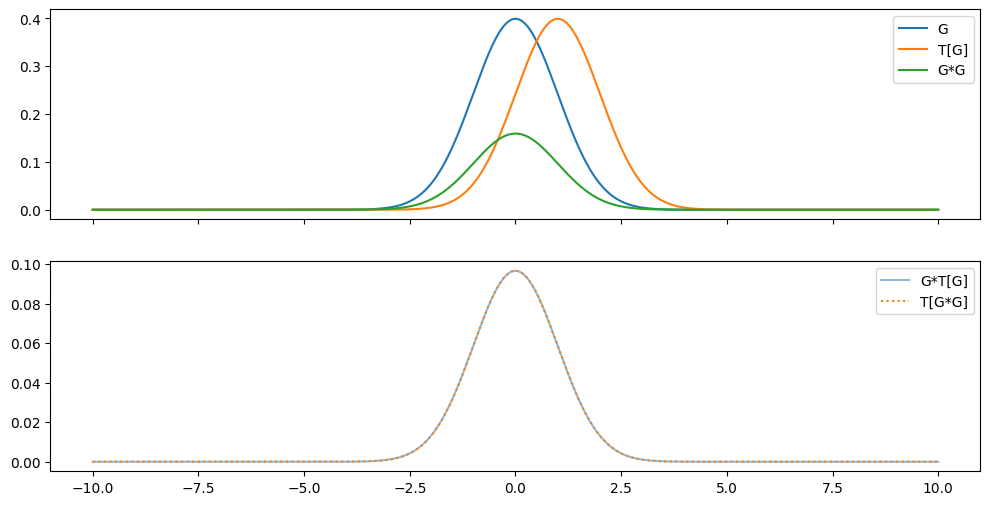

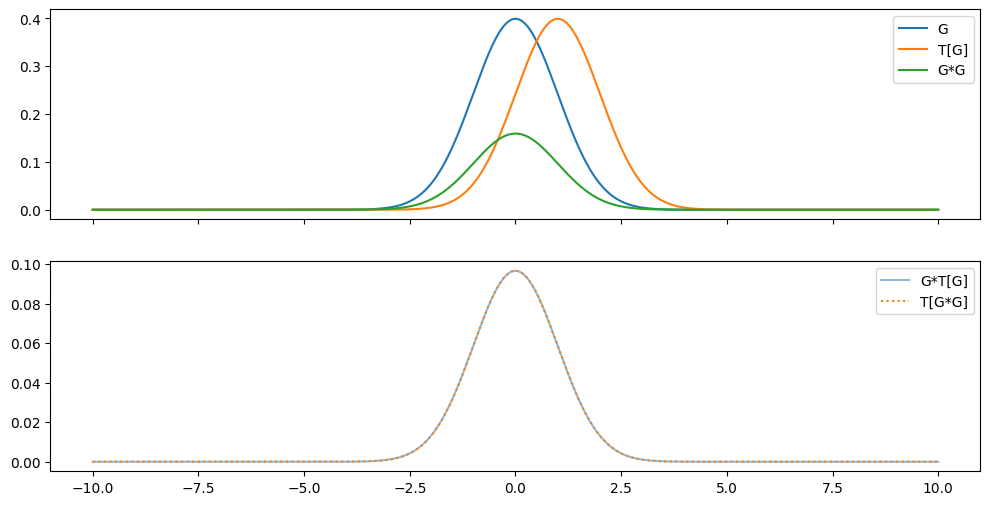

In [12]:
fig, ax = plt.subplots(2, figsize=[12, 6], sharex=True)

ax[0].plot(x, gaussian(x), label='G')
ax[0].plot(x, TG(x), label='T[G]')
ax[0].plot(x, G_star_G(x), label='G*G')


ax[1].plot(x, G_star_TG(x), label='G*T[G]', alpha=0.5)
ax[1].plot(x, G_star_TG(x), label='T[G*G]', linestyle=':')

ax[0].legend()
ax[1].legend()

#### Note that equivariance is acheived when the TWO PARAMETER kernel k(x, y) is invariant, not the one parameter kernel.

I will spend some time visualising this because it is very tricky.

In [13]:
def convert_two_parameter_kernel_to_one_parameter_kernel(k, x, y):
    def one_parameter_kernel(x):
        return k(x-y, 0)
    return one_parameter_kernel

def two_param_gaussian_kernel(x, y, sigma=1):
    Q_xy = (x-y)**2/2
    return np.exp(-Q_xy/sigma**2)

_X = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(_X, _X)
Z = two_param_gaussian_kernel(X, Y)

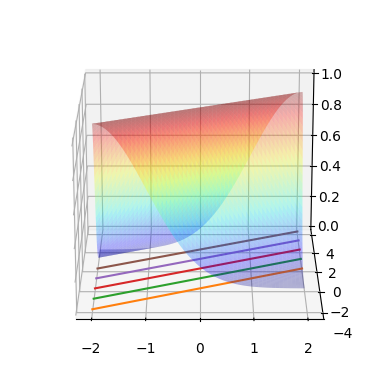

In [55]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z, cmap='jet', linewidth=1.0, alpha=0.3)

for i in range(-2, 3):
    ax.plot(_X,_X+i)

ax.view_init(20, -90)

#### Note in the above that the kernel function is constant along the lines given by gx, gy for any translation g. This is exactly our invariance requirement.

In our case, these lines run diagonally up and to the right on the domain. In other words, it depends only on the relative position of x and y on the manifold. The overall product space is 'too flexible', since it might allow the kernel to warp arbitrarily under the group action. Doing so would clearly prevent equivariance, since transforming the input would also lead to a change in the kernel.

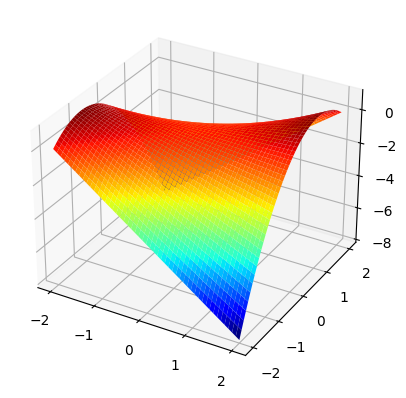

In [33]:
def bad_two_argument_kernel(x, y):
    return (x-y)*y

Z_prime = bad_two_argument_kernel(X, Y)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(X, Y, Z_prime, cmap='jet')